# ***Predicción del rendimiento de los cultivos***

# Se instala la biblioteca SciPy con el gestor de paquetes pip

In [ ]:
!pip install scipy==1.13.1

# Se importan bibliotecas para el análisis de datos,visualización y manejo de archivos.

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import scipy
scipy.__version__

'1.13.1'

In [ ]:
uploaded = files.upload()

Saving yield_df.csv to yield_df.csv


# Se cargan los datos

In [ ]:
data = pd.read_csv('yield_df.csv')

# Se elimina la primera columna de la base de datos
Debido a que es el identificador de fila y no aporta nada a nuestro analisis

In [ ]:
data = data.drop(data.columns[0], axis=1)

# Se renombra el nombre de las columnas para mejor representatividad

In [ ]:
data.rename(columns={"Item":"Producto"}, inplace=True)
data.rename(columns={"hg/ha_yield":"Rendimiento parcial"}, inplace=True)
data.rename(columns={"Year":"Año"}, inplace=True)
data.rename(columns={"average_rain_fall_mm_per_year":"Promedio de precipitacion"}, inplace=True)
data.rename(columns={"pesticides_tonnes":"Toneladas pesticida"}, inplace=True)
data.rename(columns={"avg_temp":"Temperatura promedio"}, inplace=True)
data.rename(columns={"Area":"Pais"}, inplace=True)

# Proyección de los primeros cinco datos de la base de datos

In [ ]:
data.head()

,Pais,Producto,Año,Rendimiento parcial,Promedio de precipitacion,Toneladas pesticida,Temperatura promedio
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Proyección de los ultimos 5 datos de la base de datos

In [ ]:

data.tail()

,Pais,Producto,Año,Rendimiento parcial,Promedio de precipitacion,Toneladas pesticida,Temperatura promedio
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


# Analisis descriptivo de los datos

In [ ]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
Año,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
Rendimiento parcial,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
Promedio de precipitacion,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
Toneladas pesticida,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
Temperatura promedio,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


# Verificamos que no existan valores nulos o ceros en nuestra data

In [ ]:
data.isna().sum()

,0
Pais,0
Producto,0
Año,0
Rendimiento parcial,0
Promedio de precipitacion,0
Toneladas pesticida,0
Temperatura promedio,0


# Se muestra la cantidad de filas y columnas de la base de datos

In [ ]:
data.shape

(28242, 7)

# Analisis descriptivo de los datos(Contando variables categoricas)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pais,28242,101,India,4048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Producto,28242,10,Potatoes,4276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Año,28242.0,NaN,NaN,NaN,2001.544296,7.051905,1990.0,1995.0,2001.0,2008.0,2013.0
Rendimiento parcial,28242.0,NaN,NaN,NaN,77053.332094,84956.612897,50.0,19919.25,38295.0,104676.75,501412.0
Promedio de precipitacion,28242.0,NaN,NaN,NaN,1149.05598,709.81215,51.0,593.0,1083.0,1668.0,3240.0
Toneladas pesticida,28242.0,NaN,NaN,NaN,37076.909344,59958.784665,0.04,1702.0,17529.44,48687.88,367778.0
Temperatura promedio,28242.0,NaN,NaN,NaN,20.542627,6.312051,1.3,16.7025,21.51,26.0,30.65


# Matriz de correlacion

In [ ]:
data_encoded = data.copy()  # Hace una copia del DataFrame original para trabajar sin modificarlo.
data_encoded['Pais'], _ = pd.factorize(data_encoded['Pais'])  # Convierte los valores de la columna 'Pais' a códigos numéricos.

numeric_columns = data_encoded.select_dtypes(include=np.number).columns.tolist()  # Obtiene los nombres de todas las columnas numéricas.

numeric_columns.append('Pais')  # Añade la columna 'Pais' (ya convertida a numérica) a la lista de columnas numéricas.

data_numeric = data_encoded[numeric_columns]  # Crea un DataFrame solo con las columnas numéricas.

correlation_matrix = data_numeric.corr()  # Calcula la matriz de correlación para las columnas numéricas.

correlation_with_hg_ha_yield = correlation_matrix['Rendimiento parcial']  # Extrae las correlaciones de la columna 'Rendimiento parcial'.

print("La correlación entre Rendimiento parcial y las demás variables es:")  # Mensaje descriptivo.
print(correlation_with_hg_ha_yield)  # Muestra las correlaciones específicas.


La correlación entre Rendimiento parcial y las demás variables es:
Pais                         0.006672
Año                          0.091630
Rendimiento parcial          1.000000
Promedio de precipitacion    0.000962
Toneladas pesticida          0.064085
Temperatura promedio        -0.114777
Pais                         0.006672
Name: Rendimiento parcial, dtype: float64


# Grafico de Matriz de Correlacion

                               Pais       Año  Rendimiento parcial  \
Pais                       1.000000  0.003421             0.006672   
Año                        0.003421  1.000000             0.091630   
Rendimiento parcial        0.006672  0.091630             1.000000   
Promedio de precipitacion -0.233549 -0.003798             0.000962   
Toneladas pesticida       -0.313573  0.140930             0.064085   
Temperatura promedio      -0.045739  0.014409            -0.114777   
Pais                       1.000000  0.003421             0.006672   

                           Promedio de precipitacion  Toneladas pesticida  \
Pais                                       -0.233549            -0.313573   
Año                                        -0.003798             0.140930   
Rendimiento parcial                         0.000962             0.064085   
Promedio de precipitacion                   1.000000             0.180984   
Toneladas pesticida                         0.180984  

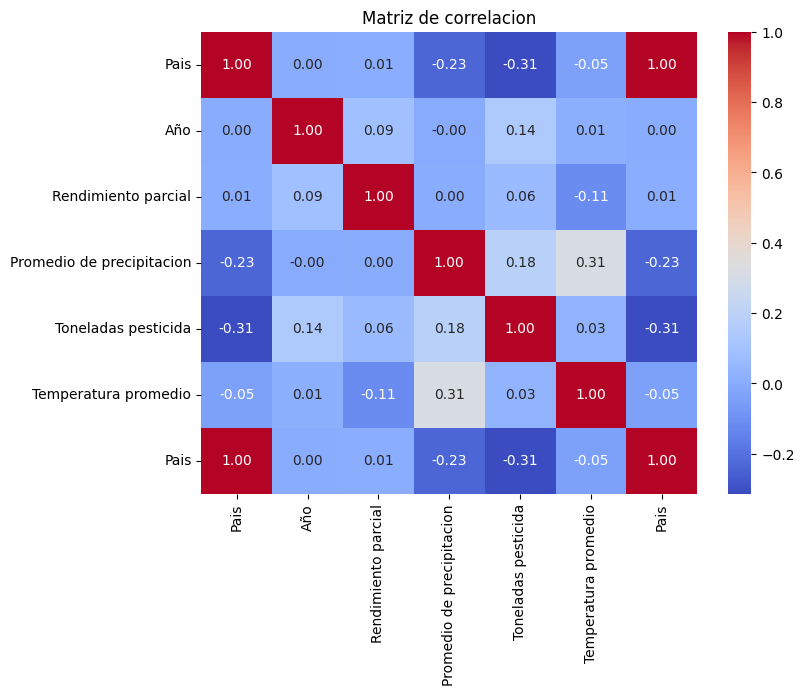

In [ ]:
plt.figure(figsize=(8, 6))  # Crea una figura
corr_matrix = data_numeric.corr()  # Calcula la matriz de correlación para las columnas numéricas.
print(corr_matrix)  # Imprime la matriz de correlación en la consola.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Dibuja un mapa de calor con anotaciones, usando un gradiente de colores 'coolwarm'.
plt.title('Matriz de correlacion')  # Establece un título para el gráfico.
plt.show()  # Muestra el gráfico en pantalla.


In [ ]:
data["Rendimiento parcial"] = data["Rendimiento parcial"].astype("float64")  # Convierte la columna 'Rendimiento parcial' al tipo de dato float64.
data["Promedio de precipitacion"] = data["Promedio de precipitacion"].astype("float64")  # Convierte la columna 'Promedio de precipitacion' al tipo de dato float64.


# Boxplots de las variables numericas

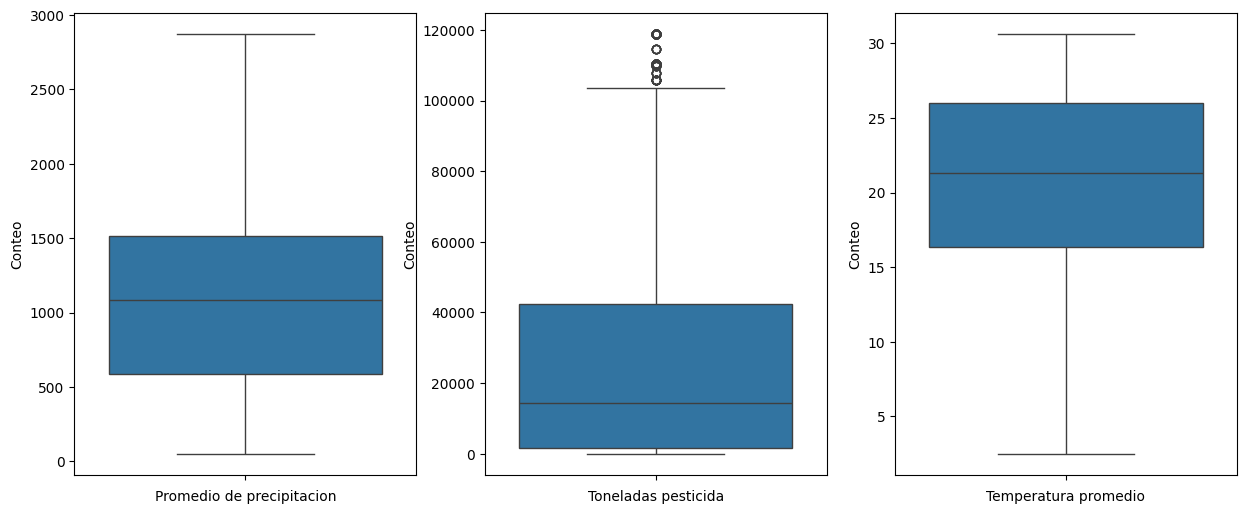

In [ ]:
plt.figure(figsize=(15, 6))  # Crea una figura de tamaño 15x6 pulgadas para acomodar tres gráficos.

plt.subplot(1, 3, 1)  # Define el primer gráfico en una cuadrícula de 1 fila y 3 columnas (posición 1).
sns.boxplot(data["Promedio de precipitacion"])  # Dibuja un gráfico de caja (boxplot) para la columna 'Promedio de precipitacion'.
plt.xlabel("Promedio de precipitacion")  # Agrega una etiqueta al eje X.
plt.ylabel("Conteo")  # Agrega una etiqueta al eje Y.

plt.subplot(1, 3, 2)  # Define el segundo gráfico en la cuadrícula (posición 2).
sns.boxplot(data["Toneladas pesticida"])  # Dibuja un gráfico de caja para la columna 'Toneladas pesticida'.
plt.xlabel("Toneladas pesticida")  # Agrega una etiqueta al eje X.
plt.ylabel("Conteo")  # Agrega una etiqueta al eje Y.

plt.subplot(1, 3, 3)  # Define el tercer gráfico en la cuadrícula (posición 3).
sns.boxplot(data["Temperatura promedio"])  # Dibuja un gráfico de caja para la columna 'Temperatura promedio'.
plt.xlabel("Temperatura promedio")  # Agrega una etiqueta al eje X.
plt.ylabel("Conteo")  # Agrega una etiqueta al eje Y.

plt.show()  # Muestra los tres gráficos en la figura.


# Pre-procesing de la data

In [ ]:
import numpy as np  # Importa la biblioteca NumPy para cálculos numéricos.
numeric_col = ['Promedio de precipitacion', 'Toneladas pesticida', 'Temperatura promedio']
def remove_outliers_iqr(df, column):  # Define una función para eliminar valores atípicos usando el rango intercuartil (IQR).
    Q1 = df[column].quantile(0.25)  # Calcula el primer cuartil (Q1) de la columna.
    Q3 = df[column].quantile(0.75)  # Calcula el tercer cuartil (Q3) de la columna.
    IQR = Q3 - Q1  # Calcula el rango intercuartil (IQR = Q3 - Q1).
    lower_bound = Q1 - 1.5 * IQR  # Calcula el límite inferior para valores atípicos.
    upper_bound = Q3 + 1.5 * IQR  # Calcula el límite superior para valores atípicos.
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Filtra las filas dentro del rango permitido.
    return df_out  # Devuelve el DataFrame sin los valores atípicos.

# Aplica la función para eliminar valores atípicos en las columnas indicadas.
data = remove_outliers_iqr(data, 'Toneladas pesticida')  # Limpia valores atípicos de 'Toneladas pesticida'.
data = remove_outliers_iqr(data, 'Temperatura promedio')  # Limpia valores atípicos de 'Temperatura promedio'.
data = remove_outliers_iqr(data, 'Promedio de precipitacion')  # Limpia valores atípicos de 'Promedio de precipitacion'.

# Boxplots de las variables numericas posterior al pre-procesing

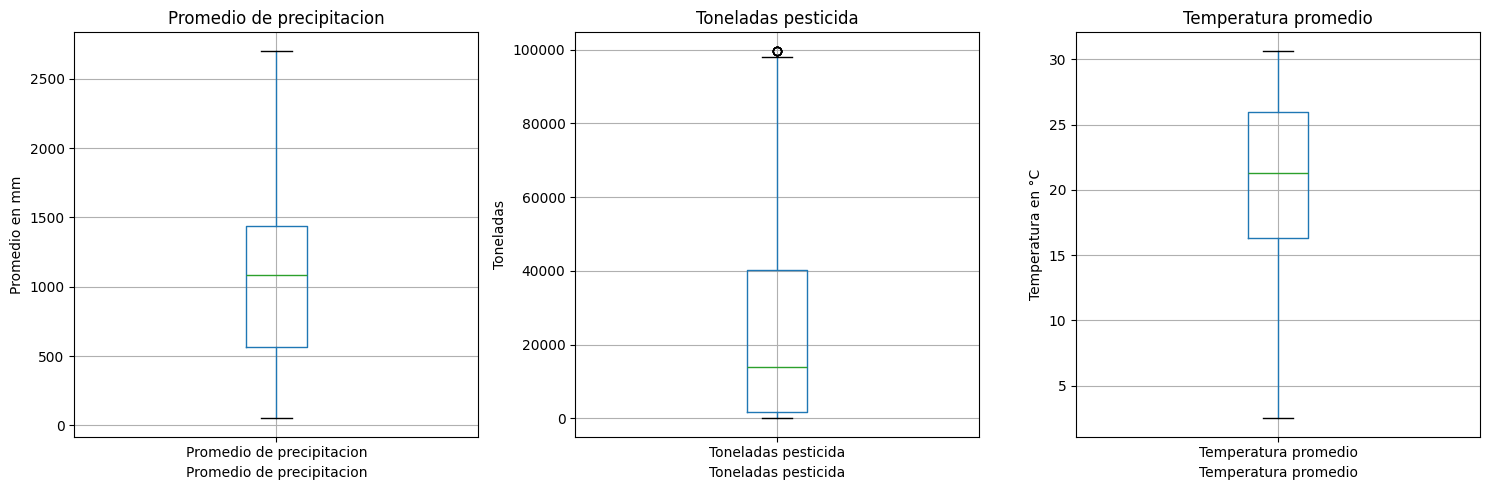

In [ ]:
import matplotlib.pyplot as plt

# Crear figura con tres subgráficas (1 fila, 3 columnas)
plt.figure(figsize=(15, 5))

# Boxplot para 'Promedio de precipitacion'
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, gráfico 1
data.boxplot(column='Promedio de precipitacion')  # Boxplot para la primera variable
plt.title('Promedio de precipitacion')
plt.xlabel('Promedio de precipitacion')
plt.ylabel('Promedio en mm')

# Boxplot para 'Toneladas pesticida'
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, gráfico 2
data.boxplot(column='Toneladas pesticida')  # Boxplot para la segunda variable
plt.title('Toneladas pesticida')
plt.xlabel('Toneladas pesticida')
plt.ylabel('Toneladas')

# Boxplot para 'Temperatura promedio'
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, gráfico 3
data.boxplot(column='Temperatura promedio')  # Boxplot para la tercera variable
plt.title('Temperatura promedio')
plt.xlabel('Temperatura promedio')
plt.ylabel('Temperatura en °C')

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()


# Data posterior al pre-procesing

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,25767.0,2001.338417,7.093659,1990.00,1995.00,2001.00,2008.00,2013.00
Rendimiento parcial,25767.0,77173.910040,86728.260208,50.00,19073.00,37525.00,102902.00,501412.00
Promedio de precipitacion,25767.0,1059.073272,642.297068,51.00,565.00,1083.00,1440.00,2702.00
Toneladas pesticida,25767.0,24001.575004,25207.692163,0.04,1597.00,13842.57,40332.00,97890.00
Temperatura promedio,25767.0,20.311131,6.433275,2.50,16.28,21.32,25.98,30.65


# Prediccion del "Rendimiento parcial" y evaluacion de efectividad de los modelos

RMSE Gradient Boosting: 34968.441603135456
R-cuadrado Gradient Boosting: 0.8378763901782809
RMSE XGBoot: 16763.20783221092
Acc XGBoost: 0.96274299260819
RMSE RF: 13902.251491788567
Acc RF: 0.9743749931431986


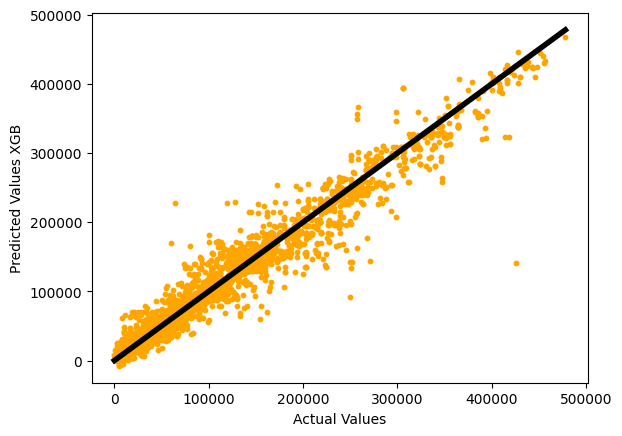

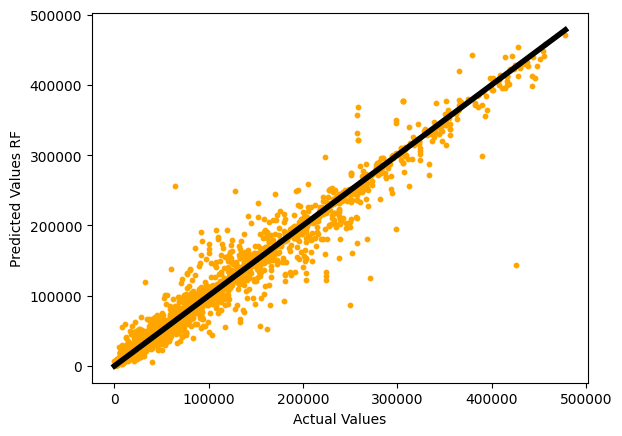

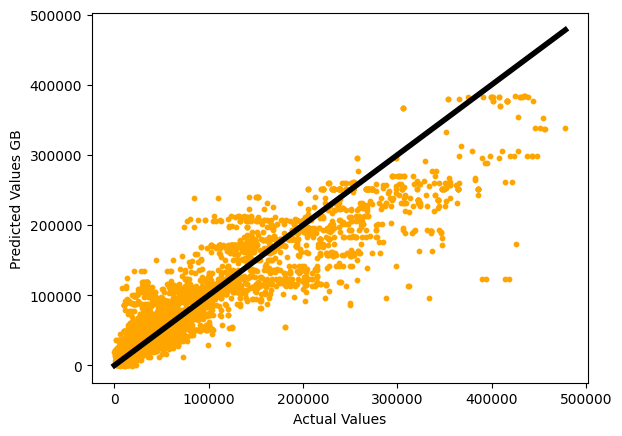

In [ ]:
from sklearn.model_selection import train_test_split  # Importa la función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import LabelEncoder  # Importa la clase para convertir variables categóricas en numéricas
from xgboost import XGBRegressor  # Importa el modelo de regresión de XGBoost
from sklearn.metrics import mean_squared_error  # Importa la función para calcular el error cuadrático medio (RMSE)
from sklearn.ensemble import RandomForestRegressor  # Importa el modelo de regresión de Random Forest
from sklearn.ensemble import GradientBoostingRegressor  # Importa el modelo de regresión de Gradient Boosting

# Convertir las variables categóricas 'Pais' y 'Producto' en variables numéricas
le_country = LabelEncoder()  # Crea un codificador para la columna 'Pais'
le_item = LabelEncoder()  # Crea un codificador para la columna 'Producto'
data['Pais'] = le_country.fit_transform(data['Pais'])  # Aplica el codificador a la columna 'Pais'
data['Producto'] = le_item.fit_transform(data['Producto'])  # Aplica el codificador a la columna 'Producto'

# Definir las variables independientes (X) y la dependiente (y)
X = data[['Pais', 'Producto', 'Promedio de precipitacion', 'Toneladas pesticida', 'Temperatura promedio']]  # Variables independientes
y = data['Rendimiento parcial']  # Variable dependiente

# Convertir 'Pais' a variables dummy (código binario para categorías)
X = pd.get_dummies(X, columns=['Pais'], prefix='Pais')  # Genera variables dummy para la columna 'Pais'

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# Inicializar y entrenar el modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)  # Modelo XGBoost con 100 estimadores
xgb_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)  # Modelo Random Forest
rf_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Inicializar y entrenar el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)  # Modelo Gradient Boosting
gb_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Realizar predicciones sobre el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)  # Predicciones del modelo XGBoost
y_pred_rf = rf_model.predict(X_test)  # Predicciones del modelo Random Forest
y_pred_gb = gb_model.predict(X_test)  # Predicciones del modelo Gradient Boosting

# Evaluar el rendimiento de los modelos con RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Calcular el RMSE para XGBoost
accuracy_xgb = xgb_model.score(X_test, y_test)  # Calcular la precisión de XGBoost
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Calcular el RMSE para Random Forest
accuracy_rf = rf_model.score(X_test, y_test)  # Calcular la precisión de Random Forest
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))  # Calcular el RMSE para Gradient Boosting
r2_gb = r2_score(y_test, y_pred_gb)  # Calcular el R² para Gradient Boosting

# Imprimir los resultados de evaluación
print(f"RMSE Gradient Boosting: {rmse_gb}")  # Mostrar RMSE de Gradient Boosting
print(f"R-cuadrado Gradient Boosting: {r2_gb}")  # Mostrar R² de Gradient Boosting
print(f"RMSE XGBoot: {rmse_xgb}")  # Mostrar RMSE de XGBoost
print(f"Acc XGBoost: {accuracy_xgb}")  # Mostrar precisión de XGBoost
print(f"RMSE RF: {rmse_rf}")  # Mostrar RMSE de Random Forest
print(f"Acc RF: {accuracy_rf}")  # Mostrar precisión de Random Forest

# Crear gráfico de dispersión de los valores reales vs. las predicciones para XGBoost
plt.scatter(y_test, y_pred_xgb, s=10, color='orange')  # Graficar los puntos de XGBoost
plt.xlabel('Actual Values')  # Etiqueta del eje X
plt.ylabel('Predicted Values XGB')  # Etiqueta del eje Y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=4)  # Línea de referencia
plt.show()  # Mostrar el gráfico

# Crear gráfico de dispersión de los valores reales vs. las predicciones para Random Forest
plt.scatter(y_test, y_pred_rf, s=10, color='orange')  # Graficar los puntos de Random Forest
plt.xlabel('Actual Values')  # Etiqueta del eje X
plt.ylabel('Predicted Values RF')  # Etiqueta del eje Y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=4)  # Línea de referencia
plt.show()  # Mostrar el gráfico

# Crear gráfico de dispersión de los valores reales vs. las predicciones para Gradient Boosting
plt.scatter(y_test, y_pred_gb, s=10, color='orange')  # Graficar los puntos de Gradient Boosting
plt.xlabel('Actual Values')  # Etiqueta del eje X
plt.ylabel('Predicted Values GB')  # Etiqueta del eje Y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=4)  # Línea de referencia
plt.show()  # Mostrar el gráfico


# ***Evaluacion de supuestos:***

Supuestos de Modelos de regresion

1. Independencia de las variables predictoras
2. No linealidad en la relación entre las variables predictoras y la variable objetivo
3. Ausencia de multicolinealidad
4. Ausencia de outliers
5. Normalidad de los residuos del modelo


                               Pais       Año  Rendimiento parcial  \
Pais                       1.000000  0.003421             0.006672   
Año                        0.003421  1.000000             0.091630   
Rendimiento parcial        0.006672  0.091630             1.000000   
Promedio de precipitacion -0.233549 -0.003798             0.000962   
Toneladas pesticida       -0.313573  0.140930             0.064085   
Temperatura promedio      -0.045739  0.014409            -0.114777   
Pais                       1.000000  0.003421             0.006672   

                           Promedio de precipitacion  Toneladas pesticida  \
Pais                                       -0.233549            -0.313573   
Año                                        -0.003798             0.140930   
Rendimiento parcial                         0.000962             0.064085   
Promedio de precipitacion                   1.000000             0.180984   
Toneladas pesticida                         0.180984  

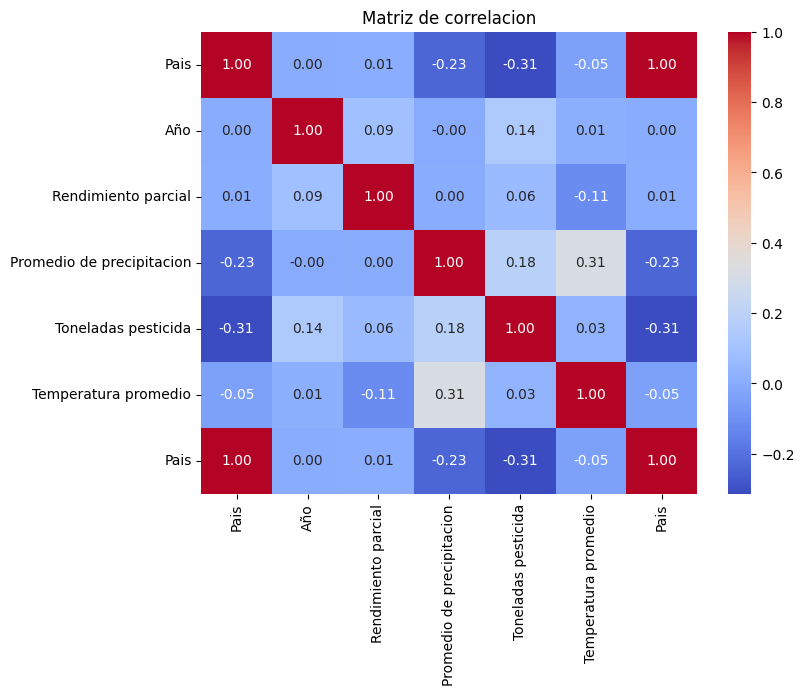

In [ ]:
#1
plt.figure(figsize=(8, 6))
corr_matrix = data_numeric.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()

En base a la matriz de correlacion podemos observar que no existe dependencia fuerte entre las variables predictoras y la variable dependiente por lo que asumimos independencia, no linealidad y tambien ausencia de multicolinealidad.

Ademas tratamos los outliers con el "método del rango intercuartílico" (IQR, por sus siglas en inglés), por lo que nos aseguramos de la ausencia de outliers

# Normalidad de los residuos

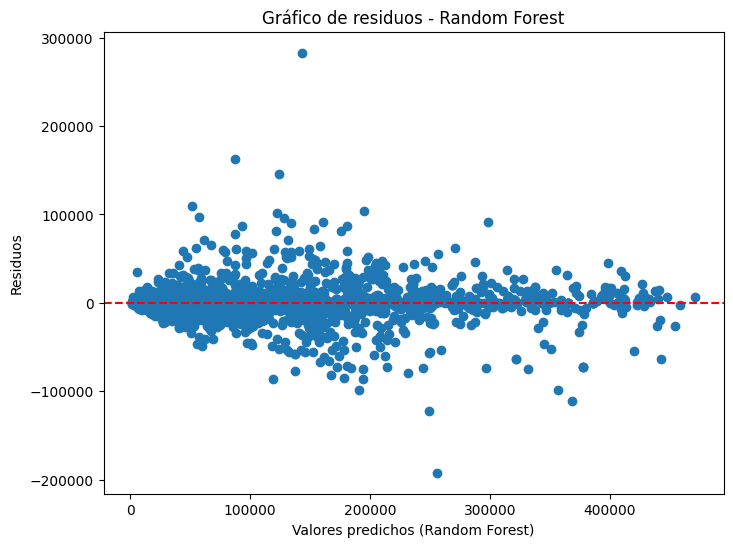

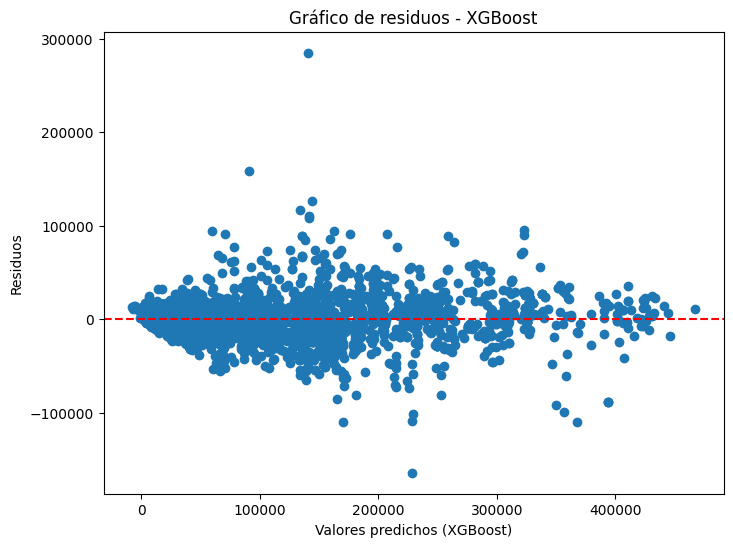

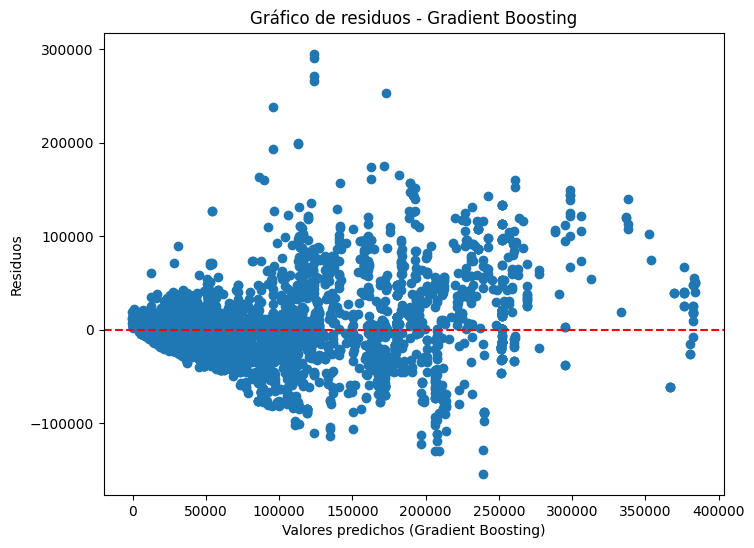

In [ ]:
import matplotlib.pyplot as plt

# Calcular los residuos para cada modelo (diferencia entre los valores reales y los predichos)
residuals_rf = y_test - y_pred_rf  # Residuos para Random Forest
residuals_xgb = y_test - y_pred_xgb  # Residuos para XGBoost
residuals_gb = y_test - y_pred_gb  # Residuos para Gradient Boosting

# Gráfico de residuos para Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf)
plt.xlabel("Valores predichos (Random Forest)")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos - Random Forest")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Gráfico de residuos para XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xgb)
plt.xlabel("Valores predichos (XGBoost)")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos - XGBoost")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Gráfico de residuos para Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, residuals_gb)
plt.xlabel("Valores predichos (Gradient Boosting)")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos - Gradient Boosting")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Como observamos en los graficos de residuos los errores convergen en el eje Y hacia el cero por lo que podemos asumir normalidad en los residuos de los modelos.
Acotacion: En el modelo de Gradient Boosting en base al ajuste normal del modelo, entrega resultados poco precisos lo cual puede observarse en su grafico de residuos que presenta una claro sesgo hacia la izquierda.